# Polynomial Regression with Regularization

This notebook demonstrates polynomial regression for modeling non-linear relationships and compares various regularization techniques to prevent overfitting.

**Contents:**
- Data loading and visualization
- Linear regression baseline
- Polynomial feature expansion
- Regularization techniques (Ridge, Lasso)
- Model comparison and performance analysis


Linear Regression is a useful method to know of, but it can only model linear relationships. The problem is that real world datasets can have a lot of non-linear relationships as well. In such cases, non-linear methods are used, one such method is **polynomial regression**.

In [2]:
# Data files should be placed in the data/ directory
# Expected files: data/X.npy and data/y.npy


Mounted at /content/drive


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.pipeline import make_pipeline

### a. Data loading: Load the data from the files `X.npy` and `y.npy` and visualize them. 


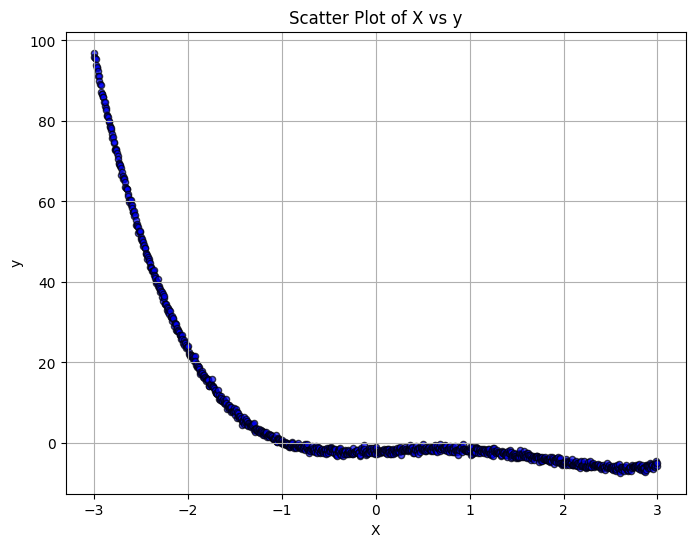

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from .npy files
X = np.load('data/X.npy')
y = np.load('data/y.npy')

# Check shapes and reshape if necessary (to 1D arrays for plotting)
X = X.reshape(-1)
y = y.reshape(-1)

# Plot X vs y
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', s=20, alpha=0.7, edgecolor='k')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X vs y')
plt.grid(True)
plt.show()


### b. Regression Models: 

Build a (https://scikit-learn.org/1.5/modules/linear_model.html) model on the provided dataset. Calculate and print the RMSE for this model.

ii. Using the given list of polynomial degrees, build (https://scikit-learn.org/1.5/modules/preprocessing.html#generating-polynomial-features) models on the given dataset for each degree and print the RMSE.

iii. Save the predictions for each model (Linear and different versions of  Polynomial) and create a plot to visualize the predictions against the actual data points.


Linear Regression RMSE: 15.2934
Polynomial Regression (Degree 2) RMSE: 8.7438
Polynomial Regression (Degree 3) RMSE: 3.1014
Polynomial Regression (Degree 4) RMSE: 0.4876


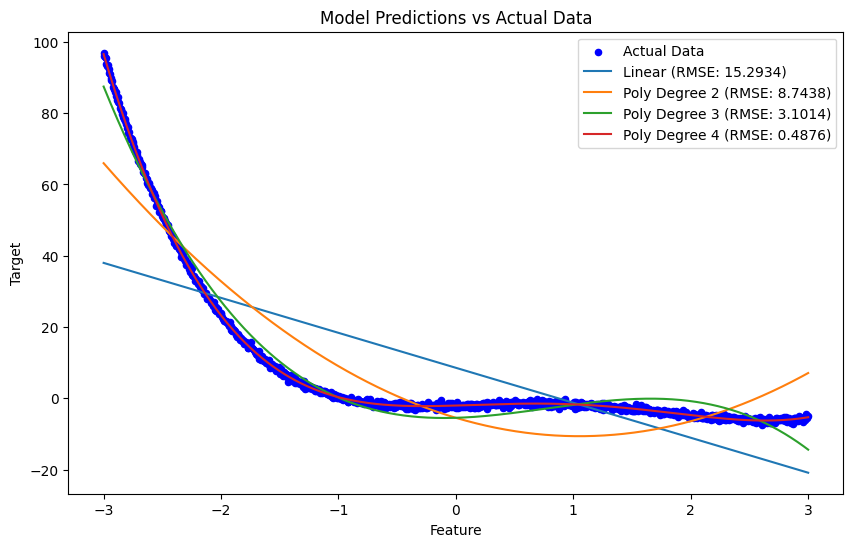

In [14]:
# Initialize a dictionary to store RMSE scores and predictions
rmse_scores = {}
predictions = {}

# Part i: Build Linear Regression model and calculate RMSE
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)
rmse_linear = root_mean_squared_error(y, y_pred_linear)
rmse_scores['Linear'] = rmse_linear
predictions['Linear'] = y_pred_linear

print(f"Linear Regression RMSE: {rmse_linear:.4f}")

# Part ii: Polynomial Regression for each degree
degrees = [2, 3, 4]
for degree in degrees:
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X, y)
    y_pred_poly = poly_model.predict(X)
    rmse_poly = root_mean_squared_error(y, y_pred_poly)
    rmse_scores[f'Poly Degree {degree}'] = rmse_poly
    predictions[f'Poly Degree {degree}'] = y_pred_poly
    print(f"Polynomial Regression (Degree {degree}) RMSE: {rmse_poly:.4f}")

# Part iii: Plot predictions against actual data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', s=20)

# Plot predictions from Linear and Polynomial models
for model_name, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f'{model_name} (RMSE: {rmse_scores[model_name]:.4f})')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Model Predictions vs Actual Data')
plt.legend()
plt.show()

In [16]:
# Print summary of RMSE scores
print("Summary of RMSE scores:")
for model_name, rmse in rmse_scores.items():
    print(f"{model_name}: {rmse:.4f}")

Summary of RMSE scores:
Linear: 15.2934
Poly Degree 2: 8.7438
Poly Degree 3: 3.1014
Poly Degree 4: 0.4876
